In [ ]:
url="https://github.com/paumayell/pangenomics/blob/gh-pages/files/familias_minis.csv"

In [1]:
import pandas as pd
import numpy as np
import umap
import umap.plot
import gudhi as gd
import matplotlib.pyplot as plt
#from umap import UMAPTransformer
from scipy.spatial.distance import pdist, squareform

In [15]:
df = pd.read_csv("/home/shaday/GIT/pangenomics/files/familias_minis.csv", index_col=0)
df_filled = df.fillna(0)
df=df_filled.replace(to_replace=r'.+', value=1, regex=True)
df

,g_A909,g_2603V,g_515,g_NEM316
A909|MGIDGNCP_01408,1,1,1,1
A909|MGIDGNCP_00096,1,1,1,1
A909|MGIDGNCP_01343,1,0,0,1
A909|MGIDGNCP_01221,1,0,1,0
A909|MGIDGNCP_01268,1,1,1,1
A909|MGIDGNCP_00580,1,1,1,1
A909|MGIDGNCP_00352,1,1,1,1
A909|MGIDGNCP_00064,1,1,1,1
A909|MGIDGNCP_00627,1,0,0,0
A909|MGIDGNCP_01082,1,1,0,0


In [7]:
c=[1,0,0,1]

In [16]:
df.loc['anti']=c

In [17]:
df=df.iloc[-2:]
df

,g_A909,g_2603V,g_515,g_NEM316
515|LHMFJANI_01625,0,0,1,1
anti,1,0,0,1


In [18]:
distances = pdist(df.values.T, metric='hamming')
distances
distance_matrix = squareform(distances)
#distance_matrix = distances
print(distance_matrix)

[[0.  0.5 1.  0.5]
 [0.5 0.  0.5 1. ]
 [1.  0.5 0.  0.5]
 [0.5 1.  0.5 0. ]]


In [19]:
distance_matrix_ejemplo = distance_matrix

In [20]:
# Distance matrix example
#distance_matrix= distance_matrix_ejemplo

# Create the simplicial complex from the distance matrix
rips_complex = gd.RipsComplex(distance_matrix)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# Compute persistence
persistence = simplex_tree.persistence()
for interval in persistence:
    print(interval)
# Compute Betti numbers

(1, (1.0, 1.4142135623730951))
(0, (0.0, inf))
(0, (0.0, 1.0))
(0, (0.0, 1.0))
(0, (0.0, 1.0))


<AxesSubplot:title={'center':'Persistence barcode'}>

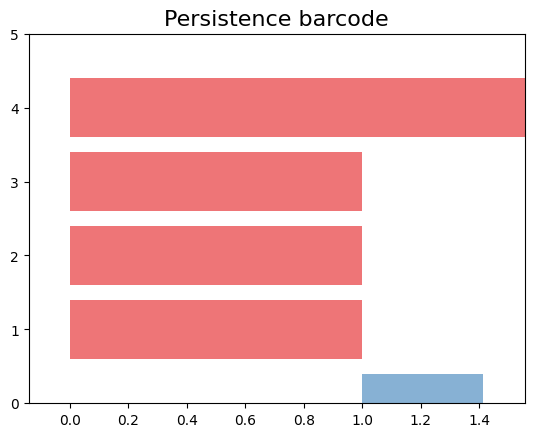

In [21]:
gd.plot_persistence_barcode(persistence)

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

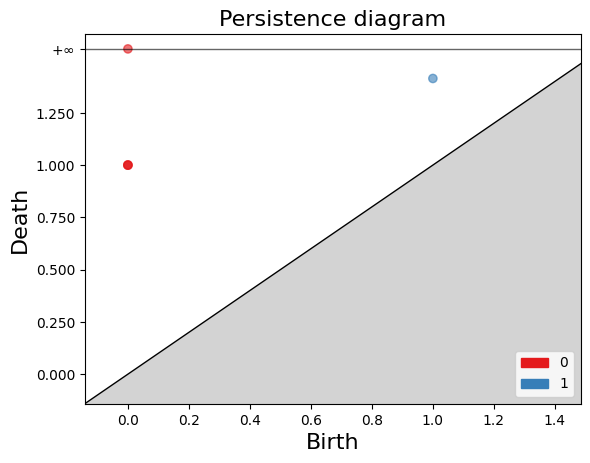

In [22]:
gd.plot_persistence_diagram(persistence,legend=True)

In [ ]:
data = {'Genoma1': [1, 0],
        'Genoma2': [1, 1],
        'Genoma3': [0, 0],
        'Genoma4': [1, 0]}
df = pd.DataFrame(data, index=['Gen1', 'Gen2'])
df